In [ ]:
import numpy as np
from scipy import optimize
!pip install -q git+https://github.com/ott-jax/ott@main

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 5.5 MB/s eta 0:00:00


In [ ]:
import jax
import jax.numpy as jnp
from ott.geometry.pointcloud import PointCloud
from ott.tools.plot import Plot
from ott.solvers.linear import sinkhorn, sinkhorn_lr
from ott.problems.linear import linear_problem
from collections import namedtuple

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
from IPython import display
from typing import Tuple

In [ ]:
def plot_tau_anim(n: int, epsilon: float = None,
                  tau_as: Tuple[float] = [1.0, .99, .95, .9, .5],
                  same_tau_b: bool = False):
  titles = []
  outs = []
  dim = 2
  rngs = jax.random.split(jax.random.PRNGKey(0),3)
  x = jax.random.uniform(rngs[0],(n,dim))
  y = jax.random.uniform(rngs[1],(n,dim))
  clim = 0.0
  for i, tau_a in enumerate(tau_as):
    geom = PointCloud(x,y, epsilon=epsilon)
    tau_b = tau_a if same_tau_b else 1.0
    out = sinkhorn.solve(geom, tau_a=tau_a, tau_b=tau_b)
    clim = max(jnp.max(out.matrix), clim)
    outs.append(out)
    marginal = out.marginal(1)
    kl_to_unif = jnp.log(n)- jnp.sum(jax.scipy.special.entr(marginal))
    prefix = 'same' if same_tau_b else ''
    if same_tau_b:
      marginal_b = out.marginal(0)
      kl_b_to_unif = jnp.log(n)- jnp.sum(jax.scipy.special.entr(marginal_b))
      title = r'$\tau_a=\tau_b$ = {0:.5f}, KL$(P1|a)$ = {1:.5f}, KL$(P^T1|b)$ = {1:.5f}'.format(tau_a, kl_to_unif, kl_b_to_unif)
    else:
      title = r'$\tau_a$ = {0:.5f}, KL$(P1|a)$ = {1:.5f}'.format(tau_a, kl_to_unif)
    titles.append(title)

  for i, tau_a in enumerate(tau_as):
    fig = plt.figure(figsize=(8, 5))
    plott = Plot(fig=fig, threshold=1e-9, title=titles[-1])
    plott(outs[i])
    plt.savefig(prefix + "tau"+str(i)+ ".png")

    plt.close()
    plt.imshow(outs[i].matrix)
    plt.title(titles[i])
    plt.clim(0, clim)
    plt.savefig(prefix + "p_tau"+str(i)+".png")
    plt.close

  fig = plt.figure(figsize=(8, 5))
  plott = Plot(fig=fig, threshold=1e-9)
  anim = plott.animate(outs, frame_rate=1, titles=titles)
  html = display.HTML(anim.to_jshtml())
  display.display(html)
  plt.close()


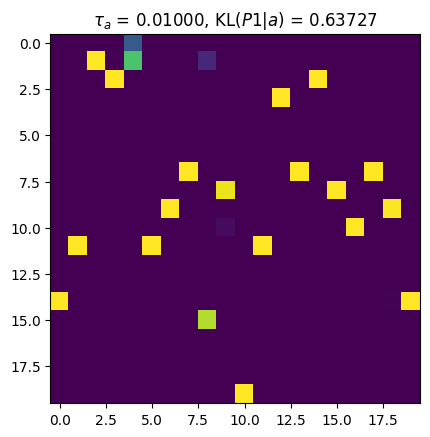

In [ ]:
step = -.2
tau_as = [1.0, .999, .99, .98, .97, .95, .9, .85, .5, .1, .01]
anim = plot_tau_anim(20, 0.001, tau_as)

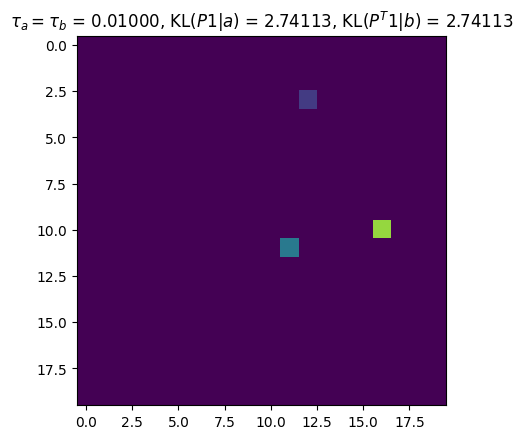

In [ ]:
step = -.2
tau_as = [1.0, .999, .99, .98, .97, .95, .9, .85, .5, .1, .01]
anim = plot_tau_anim(20, 0.001, tau_as, True)